In [55]:
import os
os.chdir("/home/haok/MoE-Research")

import pickle
from pathlib import Path
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

base = Path("results/expert-coactivation")
assert base.is_dir()


In [126]:
def plot(glob: List[Path], nrows: int, ncols: int, k: int = 16):
    fig, axs = plt.subplots(nrows, ncols, figsize=(24, 18))
    cmap = LinearSegmentedColormap.from_list("white_to_tartan", ["white", "#043673"])
    axs = axs.flatten()

    data_records = []
    global_min, global_max = float('inf'), float('-inf')
    for file in glob:
        with file.open("rb") as f:
            record = np.array(pickle.load(f))
            expert_max = record.max(axis=1)
            top_expert_indices = np.argsort(expert_max)[-k:][::-1]
            filtered_record = record[top_expert_indices][:, top_expert_indices]
            data_records.append((file, filtered_record, top_expert_indices))
            global_min = min(global_min, filtered_record.min())
            global_max = max(global_max, filtered_record.max())

    for ax, (file, filtered_record, top_expert_indices) in zip(axs, data_records):
        X, Y = np.meshgrid(np.arange(k + 1), np.arange(k + 1))
        heatmap = ax.pcolormesh(X, Y, filtered_record, cmap=cmap, shading='auto', vmin=global_min, vmax=global_max)
        ax.invert_yaxis()
        ax.set_aspect("equal")
        ax.set_xticks(np.arange(k) + 0.5)
        ax.set_yticks(np.arange(k) + 0.5)
        ax.set_xticklabels(top_expert_indices, fontsize=16)
        ax.set_yticklabels(top_expert_indices, fontsize=16)
        ax.tick_params(axis='both', which='both', length=0)
        for spine in ax.spines.values(): spine.set_visible(False)
        scale, step, layer = file.parts[-3:]
        step, layer = int(step), int(layer.removesuffix(".pkl"))
        ax.set_title(f"{scale}, step-{step}, layer-{layer}", fontsize=24)

    plt.tight_layout()
    cbar = fig.colorbar(heatmap, ax=axs, pad=0.02, fraction=0.01)
    cbar.ax.tick_params(labelsize=16)
    plt.show()


across scales, last checkpoint, at the first layer


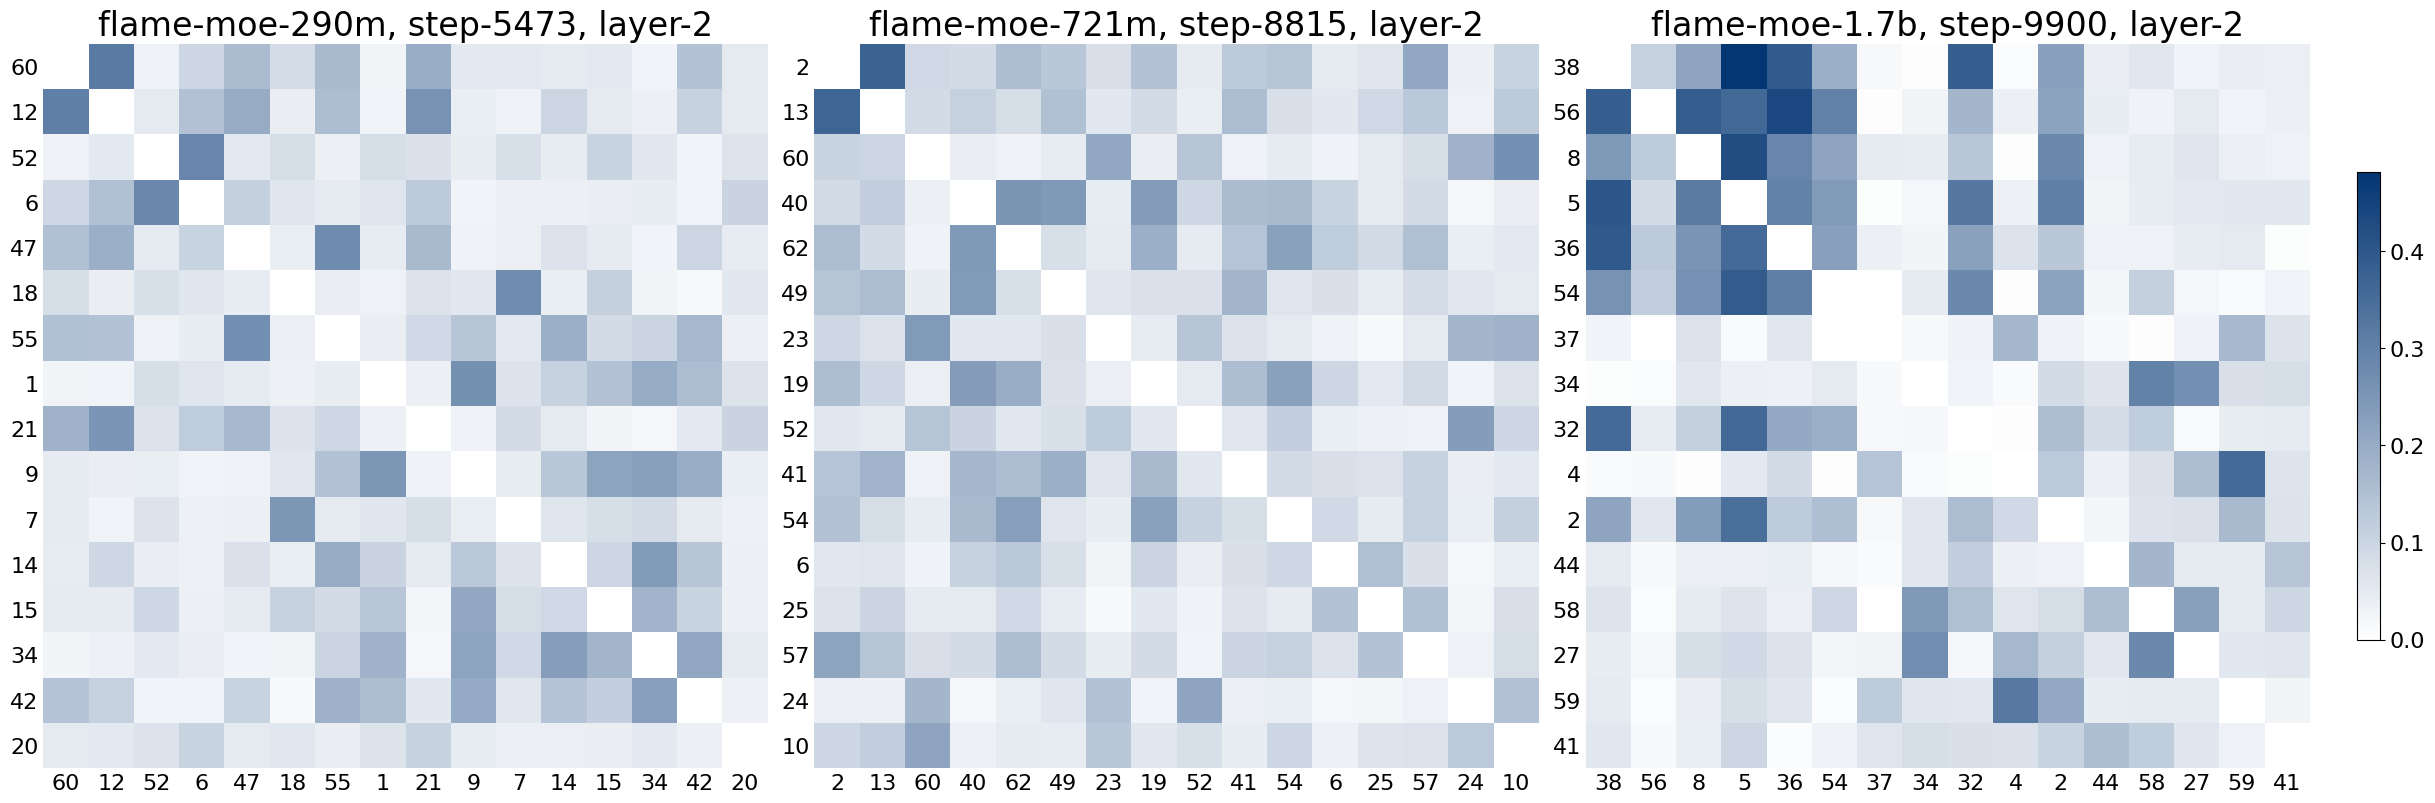

across scales, last checkpoint, at the final layer


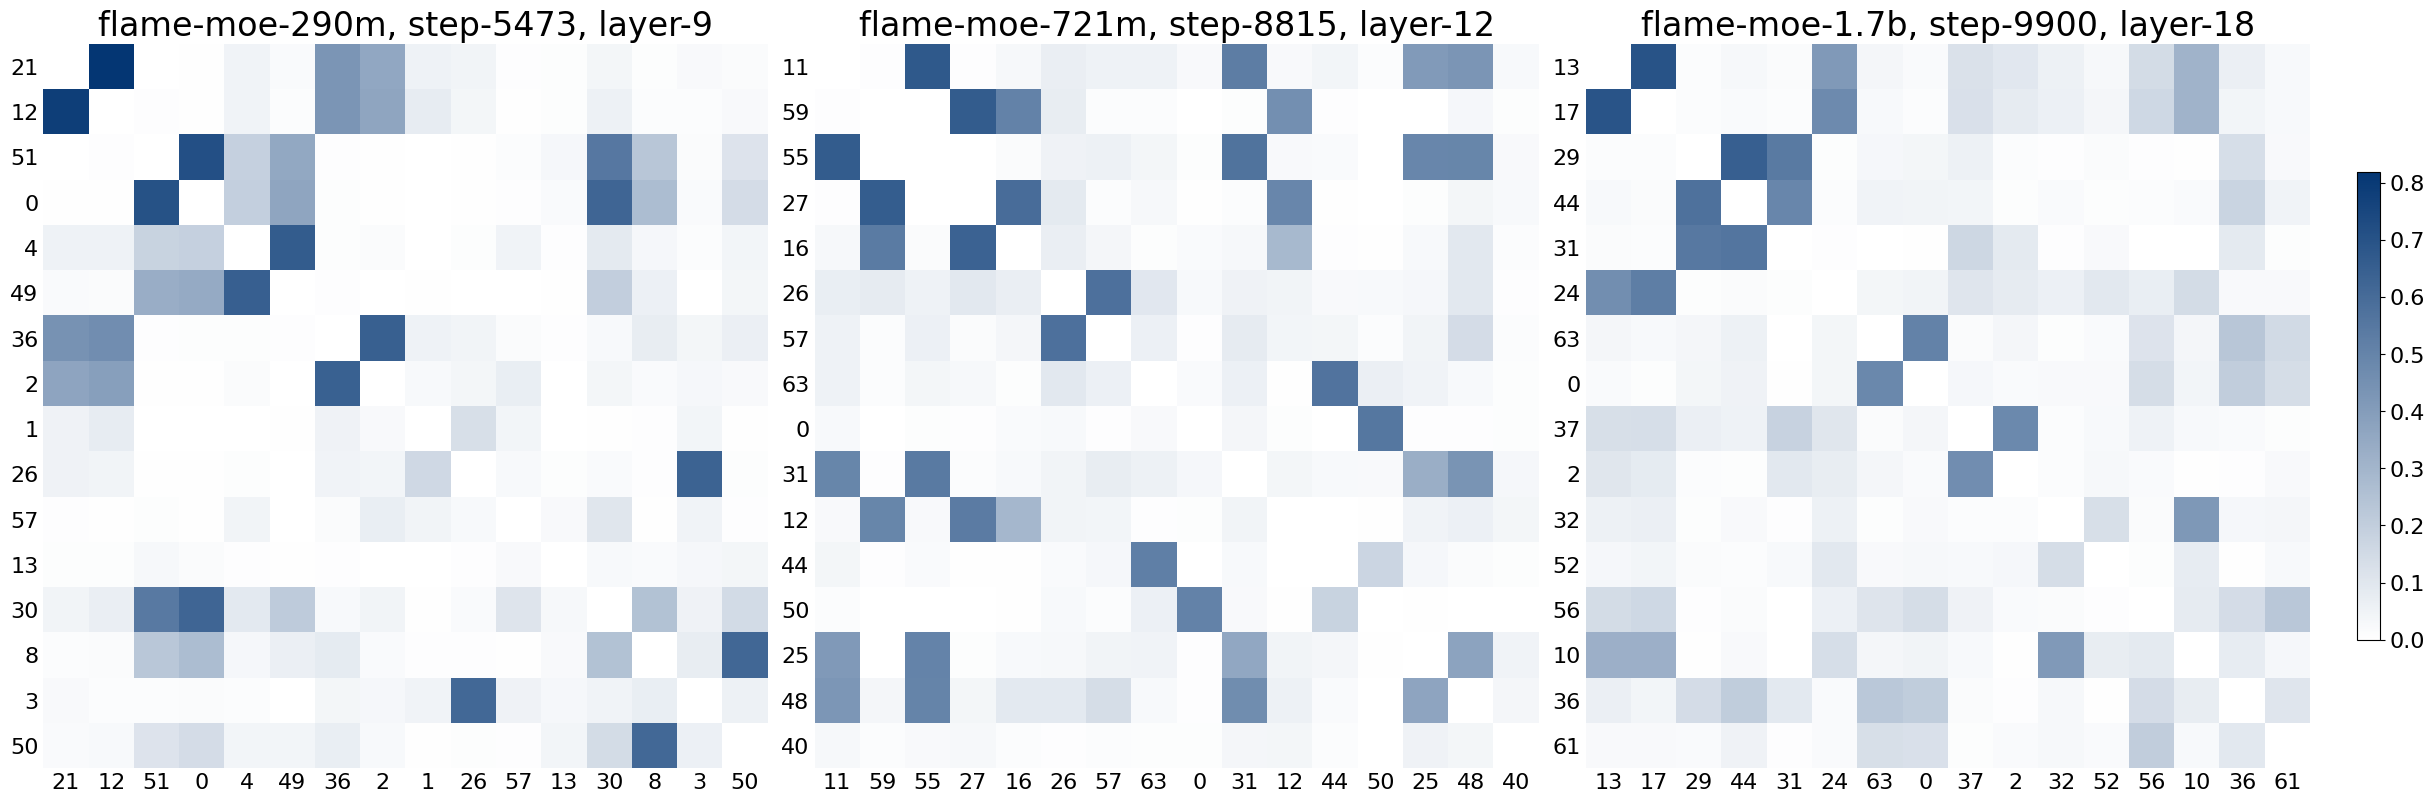

In [128]:
print("across scales, last checkpoint, at the first layer")
glob = [*base.glob("*290m/5473/2.pkl"), *base.glob("*721m/8815/2.pkl"), *base.glob("*1.7b/9900/2.pkl")]
plot(glob, 1, 3)

print("across scales, last checkpoint, at the final layer")
glob = [*base.glob("*290m/5473/9.pkl"), *base.glob("*721m/8815/12.pkl"), *base.glob("*1.7b/9900/18.pkl")]
plot(glob, 1, 3)
